# Your name: Krissy Wong
## Assignment Name: CA04 - Ensemble Models




## 1. Data Soutce and Contents 

#### Do all of these inside your Notebook: 
#####• Perform a Data Quality Analysis to find missing values, outliers, NaNs etc. 
#####• Display descriptive statistics of each column 
#####• Perform necessary data cleansing and transformation based on your observations from the data quality analysis

In [1]:
#Import packages
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# Read datasets and look at the head(5) of the data 
census_data = pd.read_csv('/gdrive/MyDrive/BSAN6070/CA03/census_data.csv')
census_data.head(5)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [4]:
# Look at the tail of the dataset 

census_data.tail(5)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0
48841,e. 51-60,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,1


In [5]:
# Describes the data according to count, mean, std, min, 25%, 50%, 75%, and max

census_data.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
# Verify the shape of the data to see the columns and rows 

census_data.shape

(48842, 11)

In [7]:
# Look at the count of records for each column in the dataset 

census_data.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [8]:
# Check all the column types 

census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [9]:
# Check for null values in the data 

census_data.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

## 2. Finding Optimal Value of a key Hyper-parameter
##### For Ensemble Models, one of the key hyper-parameter is number of “estimators”.Following is an example of fining the optimal value of “Maximum Depth”. Review the following code snippet to understand how the optimal value of this hyper-parameter(Max Depth = 10) is found by plotting a graph.

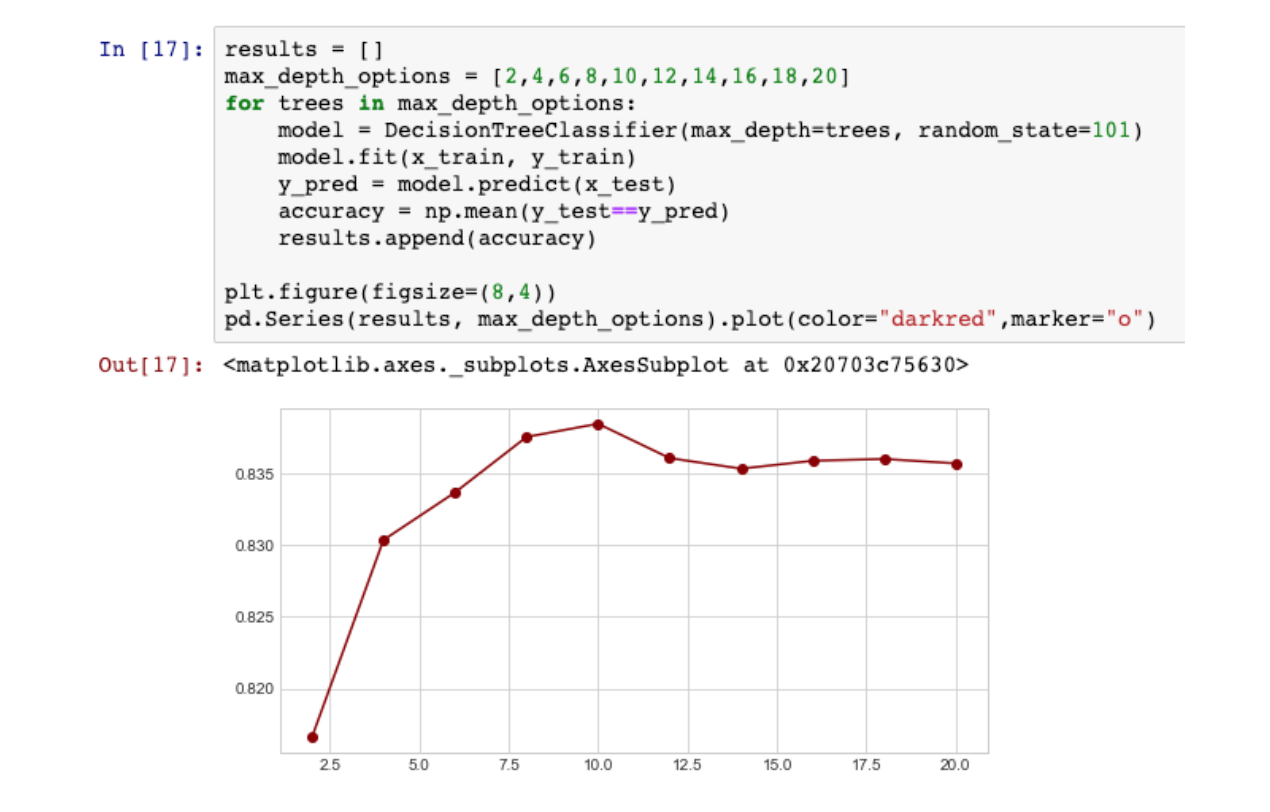


## 3. Building a Random Forest Model 

#####Using Notebook, and the same data source from CA03, train a Random Forest Model.Using similar approach of Section 2 above, plot a graph of Accuracy vs. n_estimator.

#####Use n_estimator values as [50,100,150,200,250,300,350,400,450,500].

In [10]:
# Import Packages to build Random Forest Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor  


In [11]:
# Split the data into train set and check the head 

train_set = census_data[census_data['flag'] == 'train']

train_set.head(3)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0


In [12]:
# Split the data into test set and check the head 

test_set = census_data[census_data['flag'] == 'test']

test_set.head(3)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32561,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,a. 0-8,a. Low,b. income,a. 0-25,test,0
32562,d. 41-50 & 61-70,b. Mid - Low,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,test,0
32563,b. 31-40,d. Mid - High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,b. 26-30 & 71-100,test,1


In [13]:
# Selecting independant and dependant variables from the datasets 

X_train = pd.get_dummies(train_set[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_train=train_set['y']
X_test=pd.get_dummies(test_set[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_test=test_set['y']

In [14]:
# Create Ordinal Encoder to transform categorical variables to numerical variables 
# The ordinal encoder allows us to transform all the data from the dataset in one step

oe = preprocessing.OrdinalEncoder()

In [15]:
# Encode train data sets (X_train)

oe.fit(X_train)
X_train= oe.transform(X_train)
X_train= pd.DataFrame(X_train)

X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [16]:
# Encode test data sets 
oe.fit(X_test)
X_test= oe.transform(X_test)
X_test= pd.DataFrame(X_test)

X_test.head(2)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


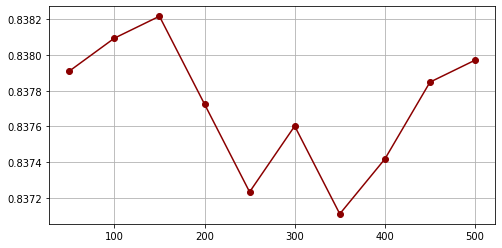

In [17]:
#Build Random Forest Model
results = []
estimator=list(range(50,550,50))

for tree in estimator:
  model=RandomForestClassifier(n_estimators=tree,random_state=101)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  accuracy=np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))

pd.Series(results,estimator).plot(color='darkred',marker='o')
plt.grid()

plt.show()


## 4. Building AdaBoost, Gradient Boost (classifier) and XGB Model

##### Repeat the process of Section 3 above for all three models here

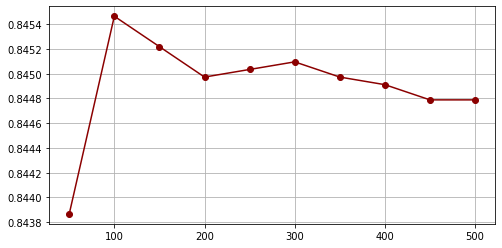

In [18]:
#Build AdaBoost Model 
results = []
estimator=list(range(50,550,50))

for tree in estimator:
  model=AdaBoostClassifier(n_estimators=tree,random_state=101)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  accuracy=np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))

pd.Series(results,estimator).plot(color='darkred',marker='o')
plt.grid()

plt.show()

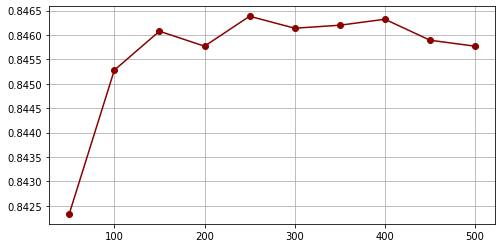

In [19]:
#Build Gradient Boost Model
results = []
estimator=list(range(50,550,50))

for tree in estimator:
  model=GradientBoostingClassifier(n_estimators=tree,random_state=101)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  accuracy=np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))

pd.Series(results,estimator).plot(color='darkred',marker='o')
plt.grid()

plt.show()

In [20]:
# Import package for XGBoost Model 

from xgboost import XGBClassifier

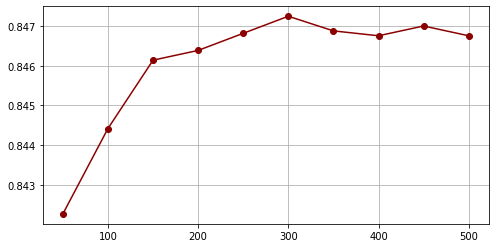

In [21]:
#Build XGB Model
results = []
estimator=list(range(50,550,50))

for tree in estimator:
  model=XGBClassifier(n_estimators=tree,random_state=101)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  accuracy=np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))

pd.Series(results,estimator).plot(color='darkred',marker='o')
plt.grid()

plt.show()

## 5. Compare Performance 

##### Keep all common Hyper-parameters same for four models (Random Forest, AdaBoost,Gradient Boost, XGB), run them again and create a performance comparison table within your code

In [22]:
# Calculating performance for Models 

# Random Forest 
rfc = []
rfc_clf = RandomForestClassifier(n_estimators=150, random_state=101)
rfc_clf.fit(X_train, y_train)
rfc_y_pred = rfc_clf.predict(X_test)

rfc_accuracy = metrics.accuracy_score(y_test, rfc_y_pred)
rfc.append(rfc_accuracy)  

rfc_AUC = roc_auc_score(y_test, rfc_y_pred)
rfc.append(rfc_AUC)

# Ada Boost 
abc = []
abc_clf = AdaBoostClassifier(n_estimators=150, random_state=101)
abc_clf.fit(X_train, y_train)
abc_y_pred = abc_clf.predict(X_test)

abc_accuracy = metrics.accuracy_score(y_test, abc_y_pred)
abc.append(abc_accuracy)

abc_AUC = roc_auc_score(y_test, abc_y_pred)
abc.append(abc_AUC)

# Gradient Boost 
gbc = []
gbc_clf = GradientBoostingClassifier(n_estimators=150, random_state=101)
gbc_clf.fit(X_train, y_train)
gbc_y_pred = gbc_clf.predict(X_test)

gbc_accuracy = metrics.accuracy_score(y_test, gbc_y_pred)
gbc.append(gbc_accuracy)

gbc_AUC = roc_auc_score(y_test, gbc_y_pred)
gbc.append(gbc_AUC)

# XGB Model 
xgb = []
xgb_clf = XGBClassifier(n_estimators=150, random_state=101)
xgb_clf.fit(X_train, y_train)
xgb_y_pred = xgb_clf.predict(X_test)

xgb_accuracy = metrics.accuracy_score(y_test, xgb_y_pred)
xgb.append(xgb_accuracy)

xgb_AUC = roc_auc_score(y_test, xgb_y_pred)
xgb.append(xgb_AUC)

# Comparing the performance of all models in a dataframe 
data_dict= {'Random Forest':rfc, 'Ada Boost':abc, 'Gradient Boost':gbc, 'XGB':xgb}
df = pd.DataFrame(data = data_dict, index = ['Accuracy', 'AUC'])
print(df)
print('n_estimator: 150')
print('random_state: 101')

          Random Forest  Ada Boost  Gradient Boost       XGB
Accuracy       0.838216   0.845218        0.846078  0.846140
AUC            0.747273   0.746738        0.754126  0.751472
n_estimator: 150
random_state: 101
